In [ ]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
!pip3 install fastai

ERROR: torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.


In [ ]:
from fastai.tabular.all import *

In [ ]:
df = pd.read_csv('/content/ds-removedjump.csv', index_col = 0)
df.head()

,temperature,rain,pm
humidity,,,
57.187500,24.420833,0.0,20.0
56.866667,25.158333,0.0,20.0
61.108333,24.066667,0.0,26.0
59.625000,22.358333,0.0,26.0
59.991667,22.804167,0.0,25.0


#CONFIG

In [ ]:
batch_size = 64
training_epoch = 500
train_test_split = 0.2

In [ ]:
splits = RandomSplitter(valid_pct = train_test_split)(range_of(df))
to = TabularPandas(df, procs=[FillMissing, Normalize],
                  cont_names = ['humidity', 'temperature', 'rain', 'pressure'],
                  y_names = 'pm',
                  splits = splits)
dls = to.dataloaders(bs=batch_size)

In [ ]:
dls.show_batch()

,humidity,temperature,rain,pm
0,37.125000,29.387501,6.0,19.0
1,51.741974,28.103214,2.8,26.0
2,80.525002,26.483334,0.0,6.0
3,63.500000,28.904167,0.0,18.0
4,78.333336,31.579166,0.0,20.0
5,74.916664,27.241667,0.0,44.0
6,83.000000,27.783333,1.2,20.0
7,78.387497,29.404167,0.2,7.0
8,10.291668,28.888763,0.4,20.0
9,81.166664,30.208334,1.2,24.0


In [ ]:
learn = tabular_learner(dls, metrics=R2Score())

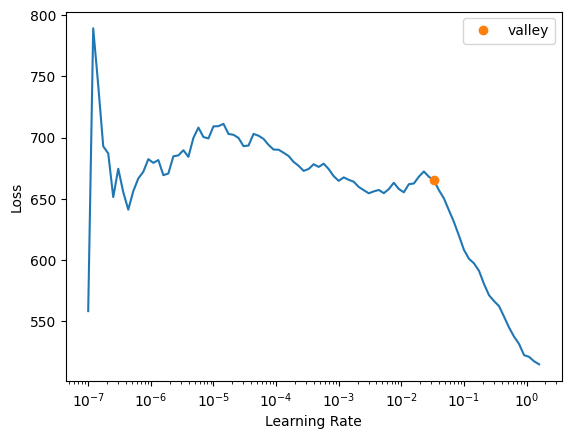

In [ ]:
lr_recom = learn.lr_find()

In [ ]:
lr_recom.valley

0.033113110810518265

In [ ]:
learn.fit(n_epoch = training_epoch, lr = lr_recom.valley)

epoch,train_loss,valid_loss,r2_score,time
0,154.579163,160.207214,0.068557,00:07
1,158.932022,389.789642,-1.266233,00:06
2,141.629028,160.128906,0.069012,00:07
3,152.801956,155.281799,0.097193,00:06
4,163.423798,156.159592,0.092090,00:07


In [ ]:
learn.show_results()

,humidity,temperature,rain,pm,pm_pred
0,0.640555,-0.583478,-0.346760,23.0,23.597681
1,0.350217,-0.749517,-0.346760,26.0,28.434893
2,0.050239,-1.263050,-0.346760,42.0,30.605347
3,-1.496060,0.480355,-0.346760,21.0,21.940218
4,-0.264088,-1.073292,-0.346760,20.0,27.177361
5,0.983579,0.236041,-0.232215,10.0,17.671162
6,0.685395,0.355588,-0.346760,24.0,20.263731
7,0.467473,0.588279,-0.346760,15.0,21.495394
8,1.007792,-0.192102,-0.346760,23.0,17.480877


In [ ]:
df.iloc[1]

humidity       56.866667
temperature    25.158333
rain            0.000000
pm             20.000000
Name: 1, dtype: float64

In [ ]:
#model_path = "/content/main_model.pkl"

In [ ]:
import pathlib
plt = platform.system()
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath

In [ ]:
def model_predict(hum, temp, pressure, rain):
    loaded_model = load_learner("/content/main_model.pkl")
    to_predict = pd.Series([hum, temp, pressure, rain], index=['humidity', 'temperature', 'pressure', 'rain'])
    return loaded_model.predict(to_predict)[0].items['pm']

In [ ]:
learn.export('model.pkl')

NameError: ignored

In [ ]:
loaded_model = load_learner('/content/model.pkl')


(   humidity  temperature     rain         pm
 0 -0.327984    -0.908439 -0.34676  26.087418,
 tensor([26.0874]),
 tensor([26.0874]))

In [ ]:
test = model_predict(50,50,50,50)

In [ ]:
test[0]

28.867928